# OpenAI Image Creation with Temperature

Temperature in deep learning is a parameter usually used to adjust the probability distribution of the predicted outputs. It is also known as softmax temperature or softmax scaling. In simple terms, it controls the level of confidence that a neural network has in its predictions. It helps to **increase the diversity of the model's outputs**.


GPTCache also enables a similar `temperature` parameter at request, in range of [0.0, 2.0], which works at two stages:
- control the possibility of sending request to OpenAI directly without searching in cache
- affect the selection of final answer from potential answers retrieved from cache

Let us try the adapted OpenAI Chat API with GPTCache enabled and see how `temperature` affects output given the same question. 


## Set Cache

Initiate GPTCache with preferred configurations and modules.

In [1]:
import time
from IPython import display
from base64 import b64decode

from gptcache import cache, Config
from gptcache.manager import manager_factory
from gptcache.embedding import Onnx
from gptcache.processor.pre import get_prompt
from gptcache.processor.post import temperature_softmax
from gptcache.similarity_evaluation.distance import SearchDistanceEvaluation
from gptcache.adapter import openai


onnx = Onnx()
data_manager = manager_factory("sqlite,faiss,local", vector_params={"dimension": onnx.dimension})

cache.init(
    pre_embedding_func=get_prompt,
    embedding_func=onnx.to_embeddings,
    data_manager=data_manager,
    similarity_evaluation=SearchDistanceEvaluation(),
    post_process_messages_func=temperature_softmax
    )
# cache.config = Config(similarity_threshold=0.2)

## Getting Started

In [2]:
prompt = 'a white siamese cat'

### default: temperature=0.0

If temperature is not specified in request, it will use the default value 0. When temperature is 0, it will firstly search through cache and return the most confident answer retrieved from cache. If there is no satisfactory answer available in cache, it will continue on sending request to OpenAI.

Time elapsed: 5.716


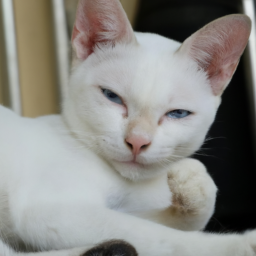

Time elapsed: 0.209


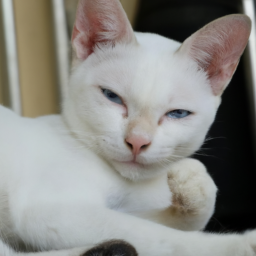

In [3]:
for _ in range(2):
    start = time.time()
    response = openai.Image.create(
        prompt=prompt,
        response_format='b64_json'
    )
    print('Time elapsed:', round(time.time() - start, 3))
    base64_data = response['data'][0]['b64_json']
    
    display.display(display.Image(b64decode(base64_data)))

### maximum: temperature=2.0

When temperature is at its maximum value of 2, it will skip searching cache and send request to OpenAI directly.

Time elapsed: 5.663


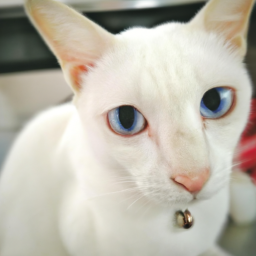

Time elapsed: 5.742


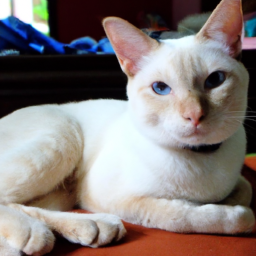

In [4]:
# use cache with temperature 2.0
for _ in range(2):
    start = time.time()
    response = openai.Image.create(
        prompt=prompt,
        response_format='b64_json',
        temperature=2.0
    )
    print('Time elapsed:', round(time.time() - start, 3))
    base64_data = response['data'][0]['b64_json']
    
    display.display(display.Image(b64decode(base64_data)))

### 0.0<temperature<2.0

When temperature is between 0 and 2, a higher value will increase the probability of skipping cache search and makes the output more random.

Time elapsed: 0.197


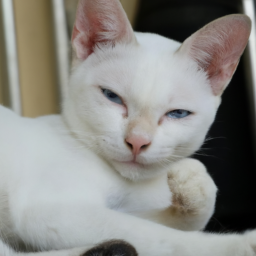

Time elapsed: 5.688


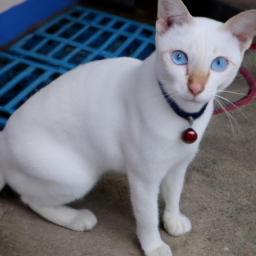

Time elapsed: 0.228


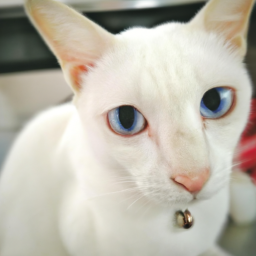

In [5]:
# use cache with temperature 1.0
for _ in range(3):
    start = time.time()
    response = openai.Image.create(
        prompt=prompt,
        response_format='b64_json',
        temperature=1.0
    )
    print('Time elapsed:', round(time.time() - start, 3))
    base64_data = response['data'][0]['b64_json']
    
    display.display(display.Image(b64decode(base64_data)))